<a href="https://colab.research.google.com/github/Achraf-Trabelsi/5G/blob/main/TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TF-IDF vectorization involves calculating the TF-IDF score for every word in your corpus relative to that document and then putting that information into a vector**



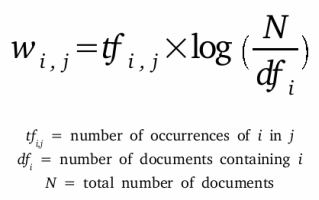



In [ ]:
import pandas as pd
import numpy as np
train=pd.read_csv("/content/drive/MyDrive/train.csv")

**PREPROCESSING**

In [ ]:

import nltk
from nltk.corpus import stopwords
import regex as re
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

porter = PorterStemmer()
lancaster=LancasterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')
other_words_to_take_out = ['school', 'students', 'people', 'would', 'could', 'many','coul','shoul','woul','stuent']
stop_words.extend(other_words_to_take_out)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(x):
  
    x=x.str.lower()
    x=x.apply(lambda x: re.sub('W*dw*','',x))
    x=x.apply(lambda x: remove_stopwords(x))
    x=x.apply(lambda x: x.split())
    return x



In [ ]:
data=train[["discourse_text","discourse_type"]]
data.head()


,discourse_text,discourse_type
0,Modern humans today are always on their phone....,Lead
1,They are some really bad consequences when stu...,Position
2,Some certain areas in the United States ban ph...,Evidence
3,"When people have phones, they know about certa...",Evidence
4,Driving is one of the way how to get around. P...,Claim


In [ ]:
labels=['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement','Counterclaim', 'Rebuttal']

y=data['discourse_type'].apply(labels.index)
y = pd.get_dummies(data['discourse_type'])


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

text=preprocess(data['discourse_text'])

for i in range(len(text)):
  text[i]=' '.join(text[i])
  text[i]=stemSentence(text[i])

sentences_train =text.values



In [ ]:
vectorizer = CountVectorizer(max_df=0.50,min_df=1,max_features=150)
data_vec = vectorizer.fit_transform(sentences_train)

In [ ]:
vectorizer.vocabulary_

In [ ]:
print(stop_words)

In [ ]:
from yellowbrick.text import FreqDistVisualizer
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(800, 1000))
visualizer.fit(data_vec)
visualizer.finalize()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
import scipy.sparse
tfidf = TfidfTransformer()
df_idf= tfidf.fit_transform(data_vec)
df_idf=pd.DataFrame.sparse.from_spmatrix(df_idf)


In [ ]:
df_idf.head()

In [ ]:
df= pd.DataFrame(tfidf.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df.sort_values(by=['idf_weights'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_idf, y, test_size=0.2, random_state=42,stratify=y )
X_train.shape
y_train.value_counts()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,LSTM
from keras.regularizers import l2
def create_deep_model(factor, rate):
    model = Sequential()     
    model.add(Dense(units=1024,kernel_regularizer=l2(factor), 
      activation='relu')), Dropout(rate),
    model.add(Dense(units=1024,kernel_regularizer=l2(factor),
      activation='relu')), Dropout(rate),
    model.add(Dense(units=512,kernel_regularizer=l2(factor),
      activation='relu')), Dropout(rate),
    model.add(Dense(units=256,kernel_regularizer=l2(factor),
      activation='relu')), Dropout(rate),
    #Output layer
    model.add(Dense(units=7, activation='softmax'))
    return model

In [ ]:
model=create_deep_model(0.0001,0.25)
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['acc']) 

In [ ]:
history=model.fit(x=X_train, y=y_train, batch_size=256, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
451/451 [==============================] - 8s 10ms/step - loss: 1.3300 - acc: 0.5670 - val_loss: 1.2216 - val_acc: 0.5983
Epoch 2/20
451/451 [==============================] - 4s 9ms/step - loss: 1.1943 - acc: 0.6054 - val_loss: 1.2022 - val_acc: 0.6005
Epoch 3/20
451/451 [==============================] - 4s 9ms/step - loss: 1.1549 - acc: 0.6180 - val_loss: 1.1841 - val_acc: 0.6121
Epoch 4/20
451/451 [==============================] - 4s 9ms/step - loss: 1.1250 - acc: 0.6302 - val_loss: 1.1810 - val_acc: 0.6113
Epoch 5/20
451/451 [==============================] - 4s 9ms/step - loss: 1.1000 - acc: 0.6409 - val_loss: 1.1948 - val_acc: 0.6065
Epoch 6/20
451/451 [==============================] - 4s 9ms/step - loss: 1.0745 - acc: 0.6510 - val_loss: 1.2141 - val_acc: 0.6054
Epoch 7/20
451/451 [==============================] - 4s 9ms/step - loss: 1.0503 - acc: 0.6618 - val_loss: 1.2288 - val_acc: 0.6048
Epoch 8/20
451/451 [==============================] - 4s 9ms/step - loss: 1

In [ ]:
score=model.evaluate(X_test,y_test)

902/902 [==============================] - 6s 7ms/step - loss: 1.8852 - acc: 0.5668


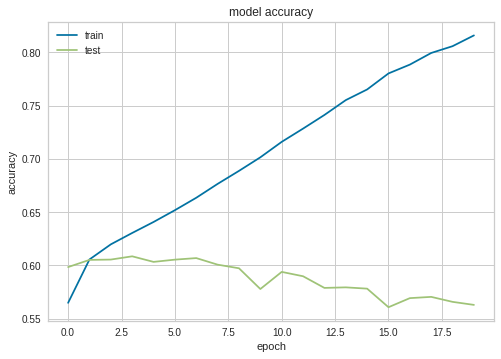

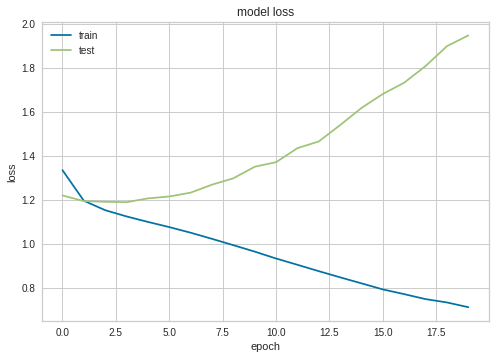

In [ ]:
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train','test'], loc='upper left')
plt.show() 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
y_test=data['discourse_type'].apply(labels.index)
y_test=y_test[:28859]
y_test.to_numpy()

array([4, 2, 1, ..., 1, 2, 0])

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

[3 0 3 ... 0 1 0]
                      precision    recall  f1-score   support

               Claim       0.35      0.41      0.38      9970
            Evidence       0.32      0.07      0.11      9115
            Position       0.11      0.03      0.04      3017
Concluding Statement       0.09      0.32      0.14      2646
                Lead       0.08      0.05      0.06      2143
        Counterclaim       0.04      0.13      0.07      1094
            Rebuttal       0.03      0.01      0.02       874

            accuracy                           0.21     28859
           macro avg       0.15      0.15      0.12     28859
        weighted avg       0.25      0.21      0.19     28859



In [ ]:
y_train.shape

(115434, 7)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

y_naive=data['discourse_type'].apply(labels.index)
y_naive=y_naive[:115434]
model = MultinomialNB()
model.fit(X_train, y_naive)

MultinomialNB()

In [ ]:
y_test.shape

(28859,)

In [ ]:
predicted = model.predict(X_test)
y_test=data['discourse_type'].apply(labels.index)
y_test=y_test[:28859]
print("Accuracy:", accuracy_score(y_test, predicted))

Accuracy: 0.343081880869053


In [ ]:
df_idf.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.0,0.597631,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.241934,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.190297,0.187553,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.361628,0.0,0.0,0.361251,0.0,...,0.0,0.0,0.0,0.000000,0.280342,0.0,0.0,0.0,0.0,0.0
